## Pytorch NN Simplest Toy-Example a XOR logical operator

Create a neural network model that works as a XOR operator.  
It can't be classified by a linear layer since its not linearly separable  
Just by using a non linear activation function it works  

In [182]:
import numpy as np
import torch as th

### Xor toy data  
[0, 0] = [0]  
[0, 1] = [1]  
[1, 0] = [1]  
[1, 1] = [0]  

In [183]:
x = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32) 

In [184]:
x

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [185]:
y

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

### Set std to 1 and mean 0  
I will not convert back so pay attention to the converted values  

In [186]:
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()

In [187]:
y.std(), y.mean(), x.std(), x.mean()

(1.0, 0.0, 1.0, 0.0)

In [276]:
x, y

(tensor([[-1., -1.],
         [-1.,  1.],
         [ 1., -1.],
         [ 1.,  1.]]), tensor([[-1.],
         [ 1.],
         [ 1.],
         [-1.]]))

### To torch tensors

In [188]:
x = torch.tensor(x)
y = torch.tensor(y)

### Simple 2D space plot

In [189]:
%matplotlib inline

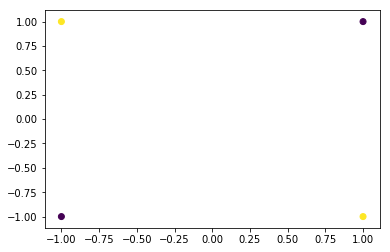

In [190]:
from matplotlib import pyplot as plt
p = y.data.numpy()
plt.scatter(x[:,0], x[:,1], c=p.flatten())

In [191]:
x.shape

torch.Size([4, 2])

In [192]:
y.shape

torch.Size([4, 1])

In [197]:
## Entry dimension is 2 
## Hidden layer dimension is 3
## Output dimension is 1
# Smaller and Faster using Sequential
model = th.nn.Sequential(th.nn.Linear(2,3), th.nn.Tanh(), th.nn.Linear(3,1))
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the Adam constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = th.nn.MSELoss()
optimizer = th.optim.Adam(model.parameters(), lr=5e-2) # learning rate optimal
for t in range(80): # 80 epochs with all 4 samples as batch
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)    
    loss = criterion(y_pred, y)
    if t%10 == 0: # print loss every 10th
        print(t, loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 2.3282554149627686
10 1.0169298648834229
20 1.0148773193359375
30 0.9847855567932129
40 0.8590525388717651
50 0.5966059565544128
60 0.22678208351135254
70 0.009673605673015118


In [198]:
# you can explore model params (like weights and bias) using model[0].weight for first layer
# 1 for activation function (has no weight or bias) or 2 for the ouput layer
model[0].weight

Parameter containing:
tensor([[-0.5846, -0.3753],
        [-1.1680,  1.8300],
        [-2.4674,  2.0393]], requires_grad=True)

### And the NN model learned very well 

In [256]:
y_pred

tensor([[-1.0571],
        [ 1.1004],
        [ 1.1488],
        [-1.0698]], grad_fn=<AddmmBackward>)

In [257]:
y

tensor([[-1.],
        [ 1.],
        [ 1.],
        [-1.]])

### Decision boundary/function

In [323]:
xi, xii = np.meshgrid(np.arange(-1, 1.1, 0.1), np.arange(-1, 1.1, 0.1))
X = np.vstack([xi.ravel(), xii.ravel()]).T
xi.shape, xii.shape

((21, 21), (21, 21))

In [317]:
model.eval() # evaluation mode disable dropout etcs.
pred = model(th.tensor(X.astype(np.float32)))
pred = pred.data.numpy()

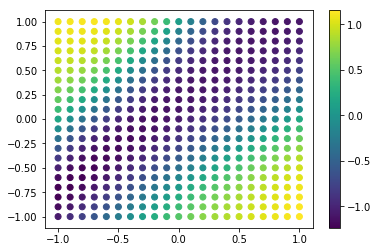

In [324]:
plt.scatter(X[:, 0], X[:, 1], c=pred.ravel())
plt.colorbar()